# <center>Gen Hut tutorial<center> 
## <center>Day 1<center>
### <center>July 19, 2021<center>

To start we import all of our dependecies.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from scipy.spatial import Voronoi, voronoi_plot_2d
from ipywidgets import widgets
from ipywidgets import interact, interact_manual, interactive
import sklearn as sk

This next block, sets up our canvas. In this case the tutorial is based around an 11x14 (standard) sheet of paper. The drawing space is set up just larger, one inch all around to be precise. 

In [2]:
# Step 1
x_bound = np.array([0,13])
y_bound = np.array([0,16])

x_buffer, y_buffer = 1,1

x_plot = x_bound + np.array([x_buffer, -x_buffer])
y_plot = y_bound + np.array([y_buffer, -y_buffer])

Next we set up a random smattering of points on that canvas.

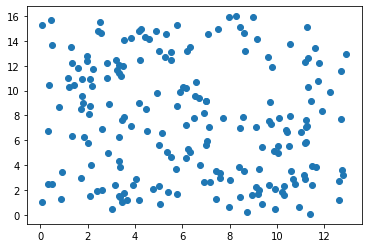

In [3]:
# Step 2
num_points = 200
x = np.random.uniform(*x_bound, size=num_points).reshape((num_points, 1))
y = np.random.uniform(*y_bound, size=num_points).reshape((num_points, 1))
pts = np.hstack([x, y])
plt.scatter(*pts.transpose())

Now that we have the points, the code uses a scipy function called Voronoi to generate vertex's between certain points.

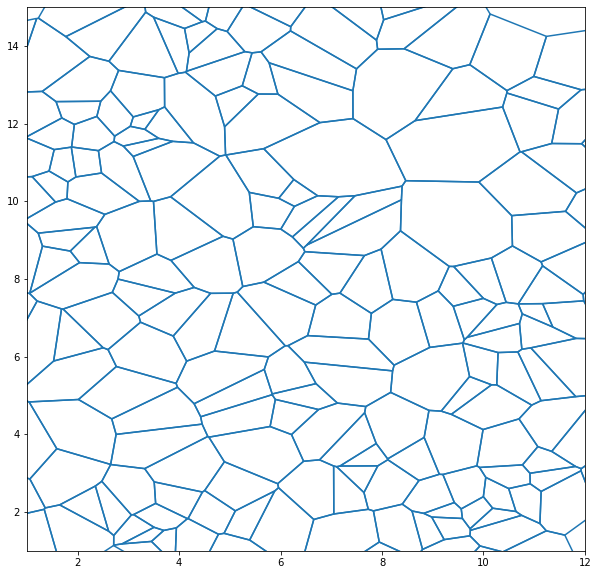

In [4]:
# Step 3
vor = Voronoi(pts)
verts = vor.vertices
shapes_ind = vor.regions

"""
We are doing three things here
1. filtering out any empty shapes (len(s) == 0)
2. filtering out any shapes that go out of bounds (then it has an index of -1)
3. Closing the polygon by adding the last point back (so [1,2,3]->[1,2,3,1])
"""
shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
shapes = [verts[s] for s in shapes_ind]

# Plot the Diagram

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(shapes)
ax.add_collection(lc)

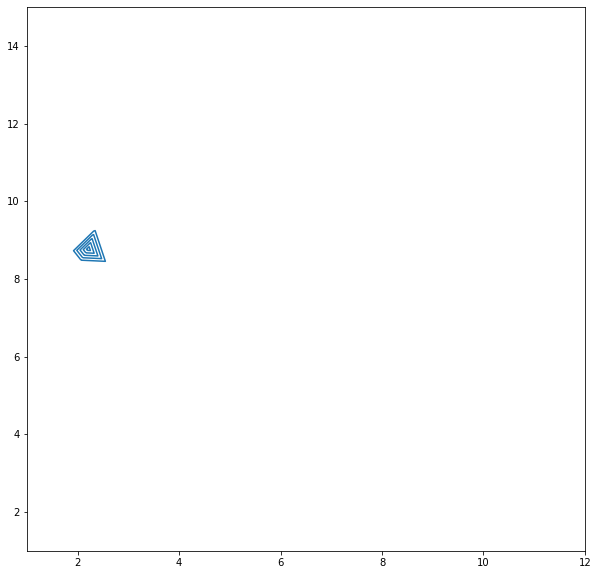

In [9]:
# Step 4
polygon_ind = 42
polygon = shapes[polygon_ind]
center = np.mean(polygon, axis=0)

rescaled = []
n_fill_lines = 5
min_scalar = 0.1 # scale it down to 1/10th the original size

for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
    scaled = scaler*(polygon - center) + center
    rescaled.append(scaled)  
    
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(rescaled)
ax.add_collection(lc)

At this point the tutorial kinda leaves you hanging, so lets see if I can get the image with our extra lines drawn.

I originally added all of the text from both steps 3 and 4 and then created a variable called both to add shapes and rescaled, but I think I just need to create the new variable and then print. That then successfully generated a correct drawing. Although at this point there is only a single area with fill. Lets move to step 6 to see about adding more.

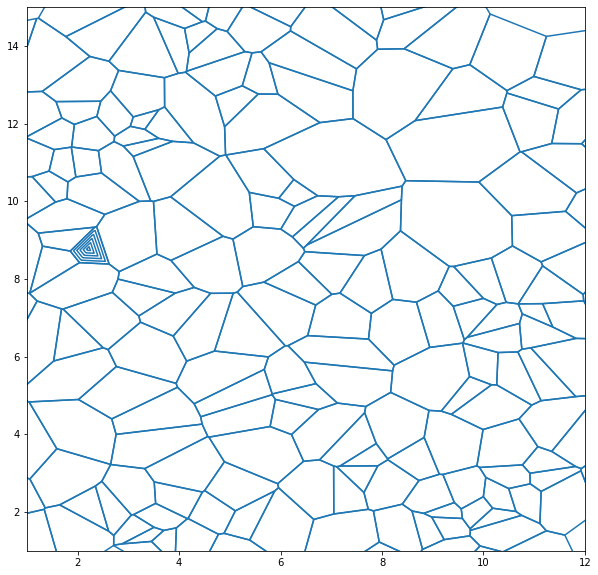

In [10]:
# Step 5
both = shapes + rescaled
# Plot the Diagram

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(both)
ax.add_collection(lc)

Ok, actually I will follow the tutorial and drop the function in and just run from there.

In [17]:
# Step 6
def make_some_art(num_points=200, percent_to_fill = 0.5, n_fill_lines=5, min_scalar = 0.1,  debug=False, toggle_for_new=False):
    
    x = np.random.uniform(*x_bound, size=num_points).reshape((num_points, 1))
    y = np.random.uniform(*y_bound, size=num_points).reshape((num_points, 1))
    pts = np.hstack([x, y])
    
    vor = Voronoi(pts)
    verts = vor.vertices
    shapes_ind = vor.regions
    
    shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
    shapes = [verts[s] for s in shapes_ind]
    
    n_shapes_to_fill = int(percent_to_fill*len(shapes))
    shapes_to_fill = np.random.choice(shapes, size=n_shapes_to_fill, replace=False)
    
    fill = []
    
    for s in shapes_to_fill:
        center = np.mean(s, axis=0)
        for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
            scaled = scaler*(s - center) + center
            fill.append(scaled)

    
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_aspect('equal')
    
    if not debug:
        plt.grid(False)
        plt.axis('off')

    
    ax.set_xlim(*x_plot)
    ax.set_ylim(*y_plot)
    lc = LineCollection(shapes+fill)
    ax.add_collection(lc)
    
    return fig, ax
    
w = interactive(make_some_art,
                num_points=(10,1000,25),
                percent_to_fill=(0., 1., 0.05),
                n_fill_lines=(1, 20, 1),
                min_scalar=(0,1,0.01))
display(w)

interactive(children=(IntSlider(value=200, description='num_points', max=1000, min=10, step=25), FloatSlider(v…